In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras.optimizers import Adam

In [2]:
(mnist_train_images,mnist_train_labels),(mnist_test_images,mnist_test_labels) = mnist.load_data()

In [3]:
train_images = mnist_train_images.reshape(60000,784)
test_images = mnist_test_images.reshape(10000,784)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [4]:
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


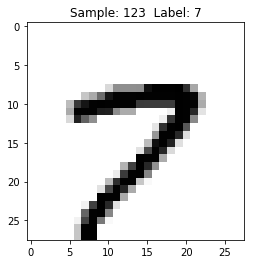

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def Display_Sample(num):
    print(train_labels[num])
    label = train_labels[num].argmax(axis = 0)
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
Display_Sample(123)    

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])


In [9]:
history  =model.fit(train_images,train_labels,
                   batch_size=100,
                   epochs=10,
                   verbose =2,
                   validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 0.2411 - acc: 0.9274 - val_loss: 0.1081 - val_acc: 0.9660
Epoch 2/10
 - 7s - loss: 0.0997 - acc: 0.9693 - val_loss: 0.0932 - val_acc: 0.9712
Epoch 3/10
 - 7s - loss: 0.0718 - acc: 0.9776 - val_loss: 0.0748 - val_acc: 0.9769
Epoch 4/10
 - 7s - loss: 0.0570 - acc: 0.9821 - val_loss: 0.0669 - val_acc: 0.9799
Epoch 5/10
 - 7s - loss: 0.0469 - acc: 0.9852 - val_loss: 0.0621 - val_acc: 0.9801
Epoch 6/10
 - 7s - loss: 0.0414 - acc: 0.9865 - val_loss: 0.0651 - val_acc: 0.9805
Epoch 7/10
 - 7s - loss: 0.0360 - acc: 0.9884 - val_loss: 0.0580 - val_acc: 0.9830
Epoch 8/10
 - 7s - loss: 0.0300 - acc: 0.9903 - val_loss: 0.0652 - val_acc: 0.9823
Epoch 9/10
 - 7s - loss: 0.0291 - acc: 0.9908 - val_loss: 0.0760 - val_acc: 0.9790
Epoch 10/10
 - 7s - loss: 0.0268 - acc: 0.9912 - val_loss: 0.0718 - val_acc: 0.9823


In [10]:
score =model.evaluate(test_images,test_labels,verbose=0)
print("Test_loss:", score[0])
print("Test_accuracy:", score[1])

Test_loss: 0.0718255384237469
Test_accuracy: 0.9823


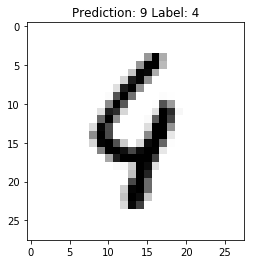

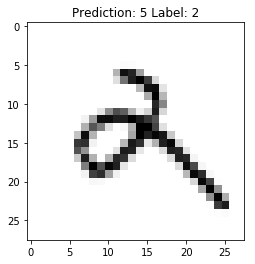

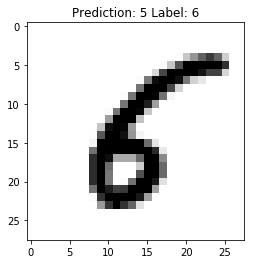

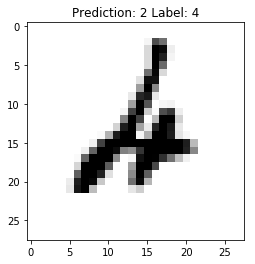

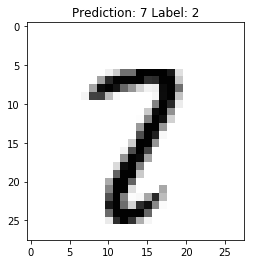

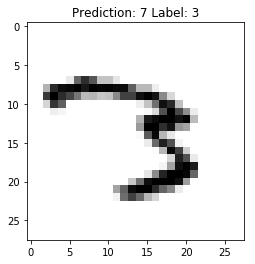

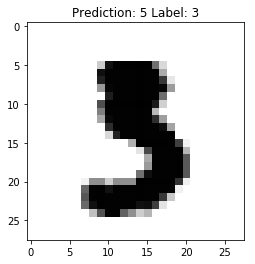

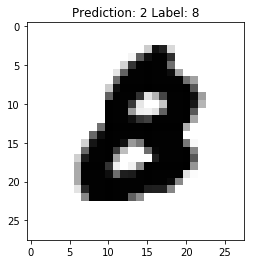

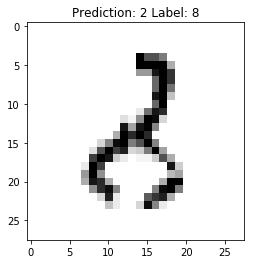

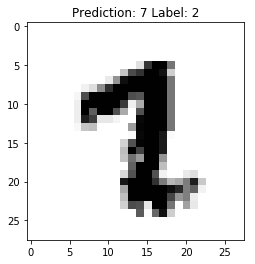

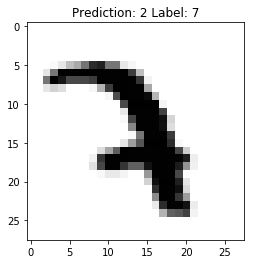

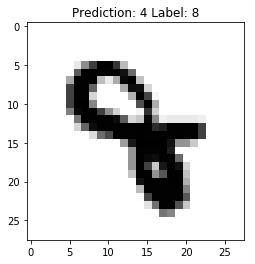

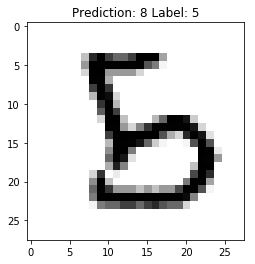

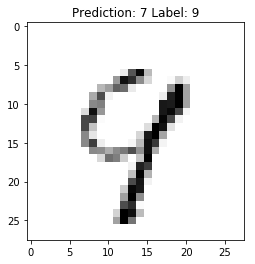

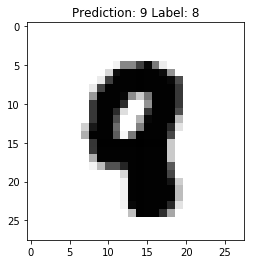

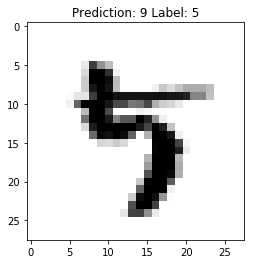

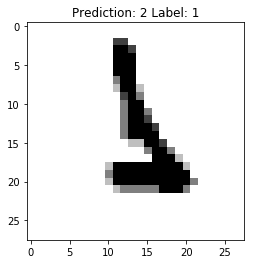

In [11]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()